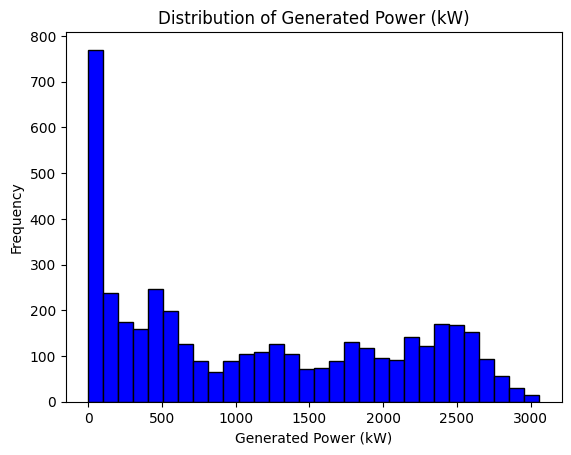

In [80]:
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('solar-panel-data.csv')

# Plotting the histogram
plt.hist(data['generated_power_kw'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


In [81]:
pip install matplotlib seaborn

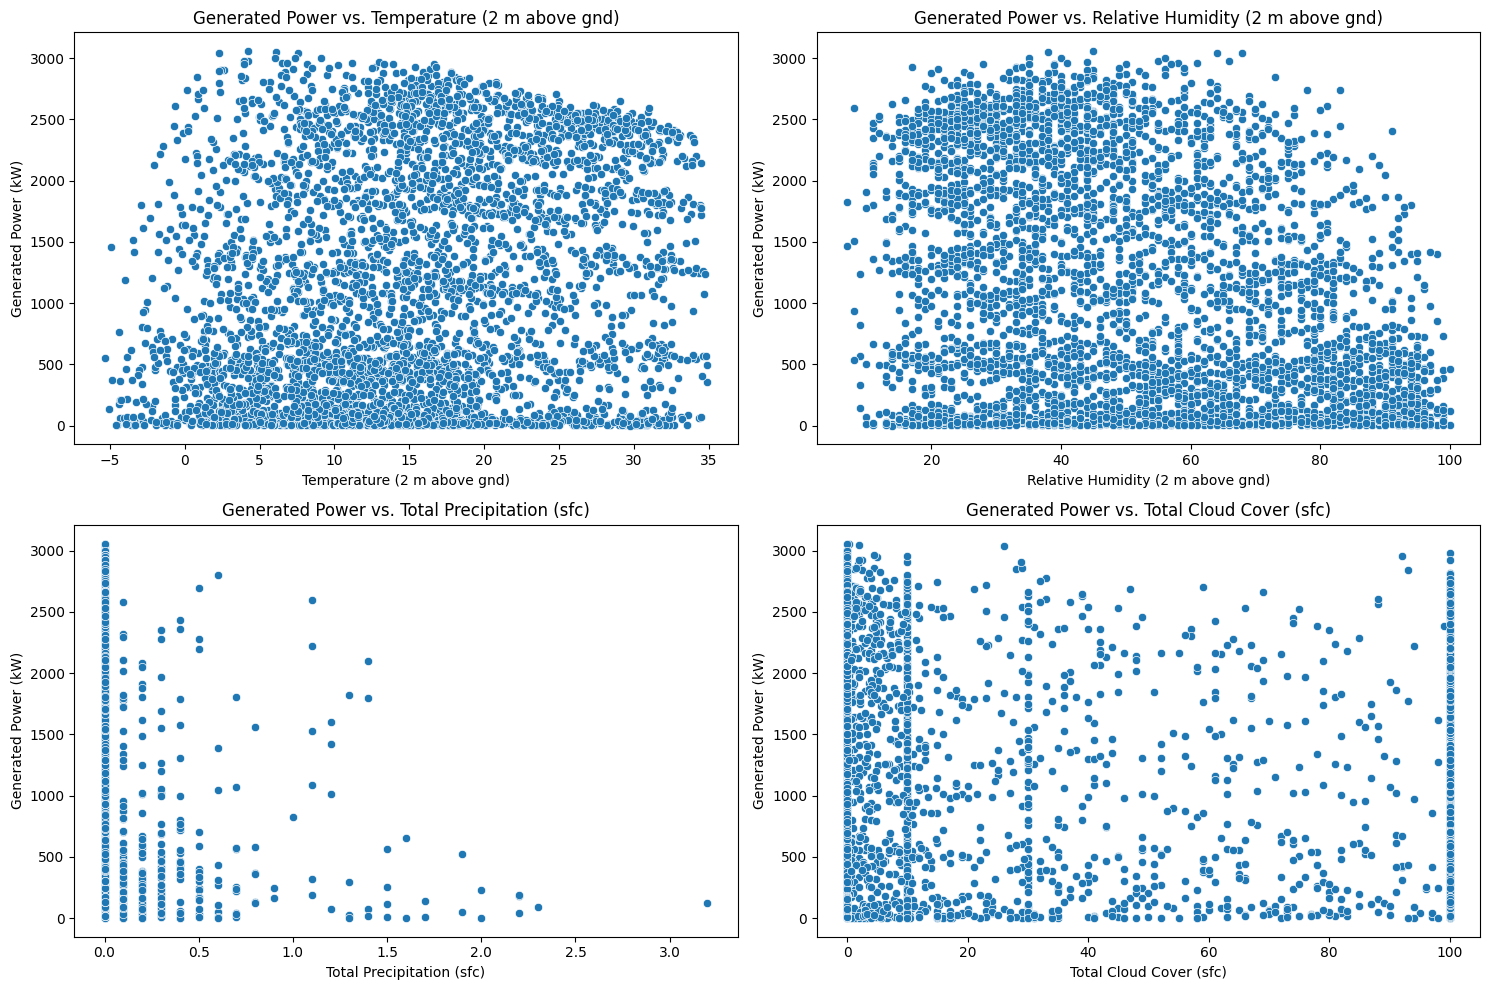

In [82]:
import seaborn as sns

# Define the variables for plotting
variables = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
             'total_precipitation_sfc', 'total_cloud_cover_sfc']
titles = ['Temperature (2 m above gnd)', 'Relative Humidity (2 m above gnd)',
          'Total Precipitation (sfc)', 'Total Cloud Cover (sfc)']

# Creating scatter plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=var, y='generated_power_kw')
    plt.title(f'Generated Power vs. {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

Ok, this is a good analysis. Temperature and humidity don't seem to have much impact, but total cloud cover and total precipitation do seem to have an impact.

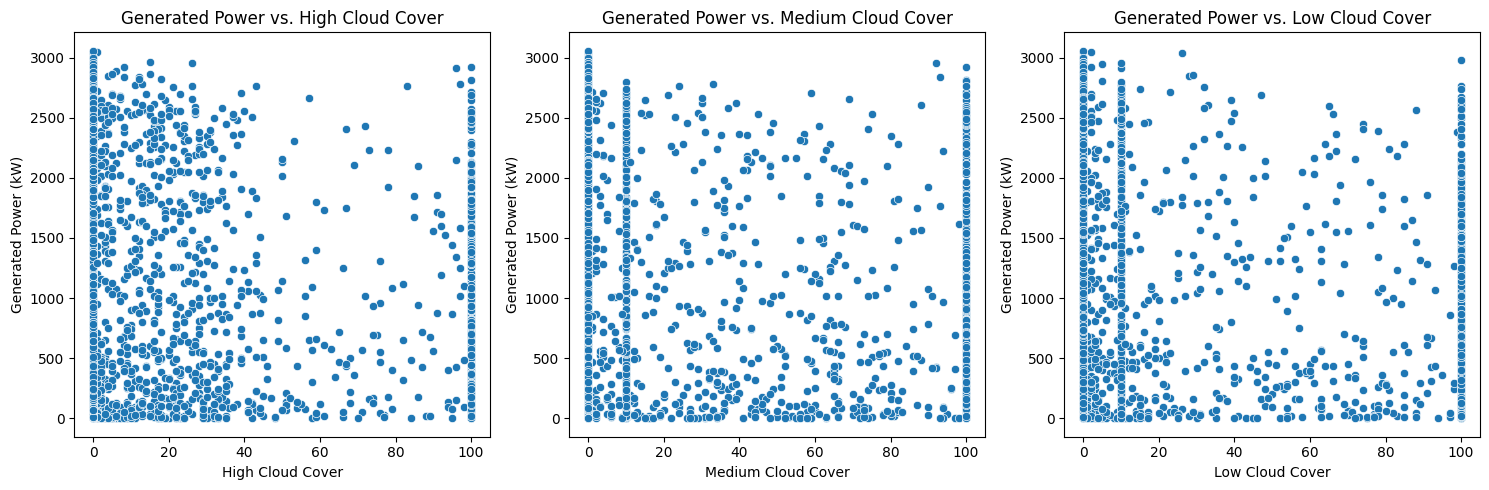

In [83]:
# Define the variables for plotting
variables = ['high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay']
titles = ['High Cloud Cover', 'Medium Cloud Cover', 'Low Cloud Cover']

# Creating scatter plots
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=data, x=var, y='generated_power_kw')
    plt.title(f'Generated Power vs. {titles[i]}')
    plt.xlabel(titles[i])
    plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

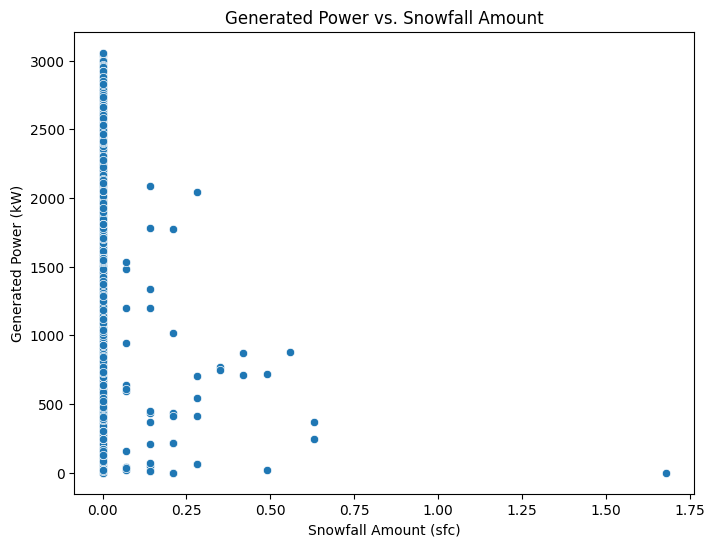

In [84]:
# Checking the impact of snowfall

plt.figure(figsize=(8, 6))
original_data = sns.scatterplot(data=data, x='snowfall_amount_sfc', y='generated_power_kw')
plt.title('Generated Power vs. Snowfall Amount')
plt.xlabel('Snowfall Amount (sfc)')
plt.ylabel('Generated Power (kW)')
plt.show()


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('solar-panel-data.csv')

# Prepare the data
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred < 0, 0, y_pred)  # Replace negative values with 0

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 242336.83164230004


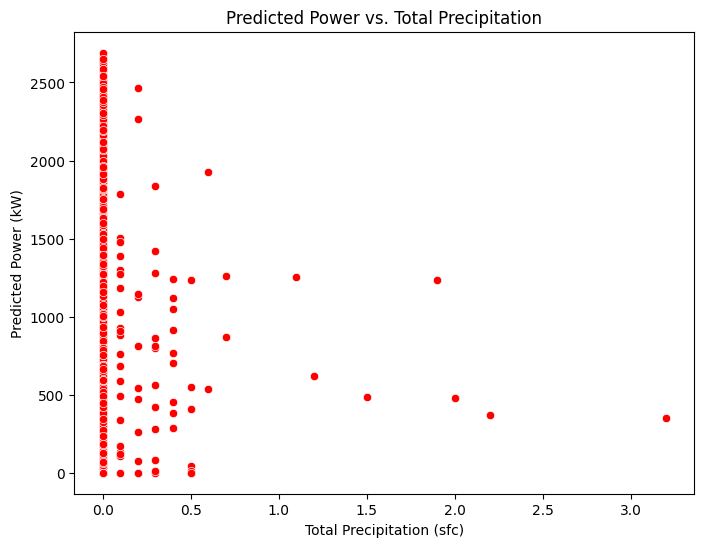

In [86]:
# Add predictions to the test set for plotting

X_test['predicted_power'] = y_pred

# Plot
plt.figure(figsize=(8, 6))
machine_data = sns.scatterplot(data=X_test, x='total_precipitation_sfc', y='predicted_power',color='red')
plt.title('Predicted Power vs. Total Precipitation')
plt.xlabel('Total Precipitation (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

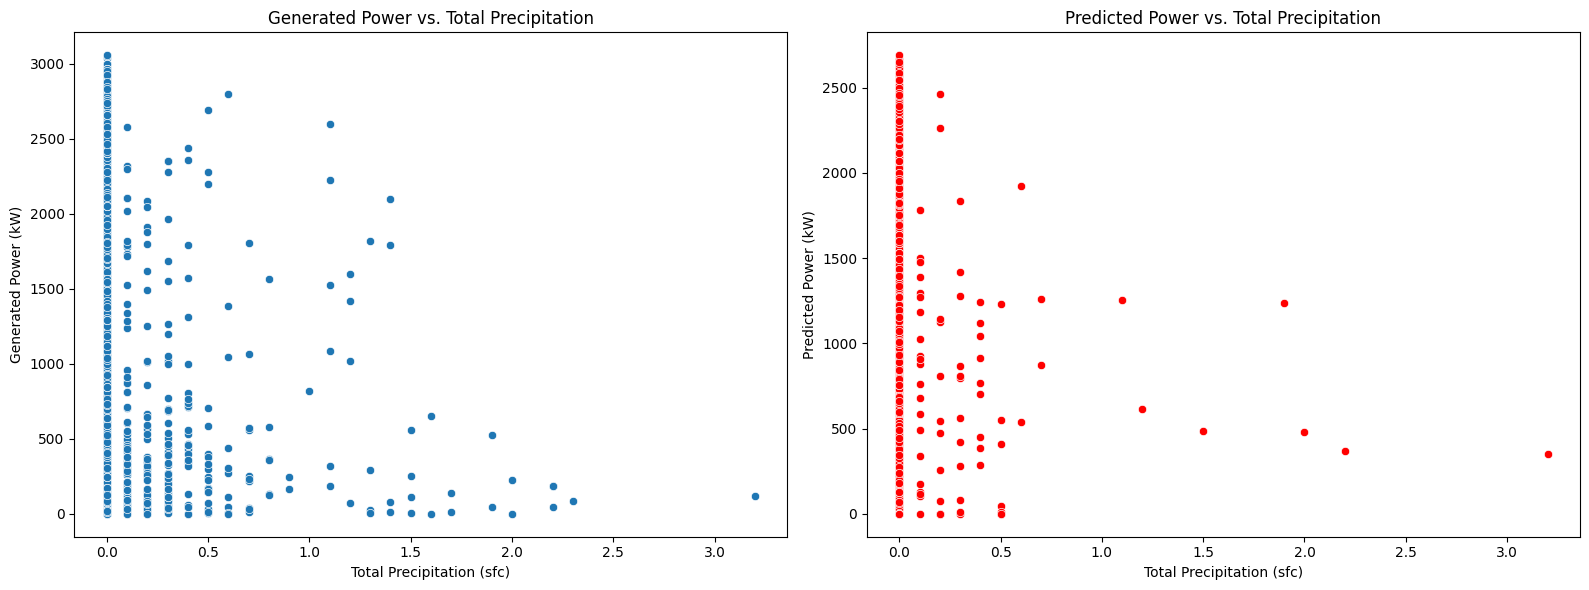

In [87]:
X_test['predicted_power'] = y_pred

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original data in the first subplot
sns.scatterplot(ax=axs[0], data=data, x='total_precipitation_sfc', y='generated_power_kw')
axs[0].set_title('Generated Power vs. Total Precipitation')
axs[0].set_xlabel('Total Precipitation (sfc)')
axs[0].set_ylabel('Generated Power (kW)')

# Plot the machine learning predictions in the second subplot
sns.scatterplot(ax=axs[1], data=X_test, x='total_precipitation_sfc', y='predicted_power', color='red')
axs[1].set_title('Predicted Power vs. Total Precipitation')
axs[1].set_xlabel('Total Precipitation (sfc)')
axs[1].set_ylabel('Predicted Power (kW)')

# Display the plots
plt.tight_layout()
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 366.97594995954586
Mean Squared Error: 242336.83164230004
Root Mean Squared Error: 492.27718984561943
R-squared Score: 0.7347055893985727


Let's try a different approach with gradient boosting

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

# Load the data
data = pd.read_csv('solar-panel-data.csv')

# Prepare the data
X = data.drop('generated_power_kw', axis=1)
y = data['generated_power_kw']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_gb = np.where(y_pred_gb < 0, 0, y_pred_gb)  # Replace negative values with 0

# Calculate the mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error with Gradient Boosting: {mse_gb}")

Mean Squared Error with Gradient Boosting: 180124.45727249997


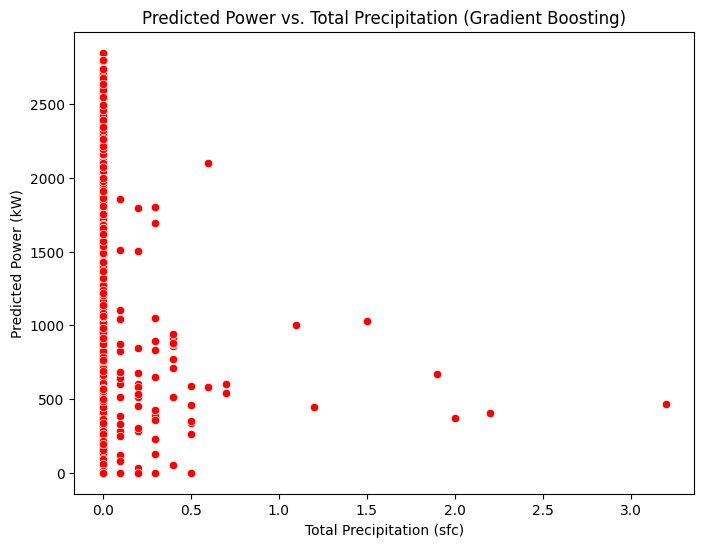

In [90]:
# Add the predictions to the test set for plotting
X_test['predicted_power_gb'] = y_pred_gb

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test, x='total_precipitation_sfc', y='predicted_power_gb', color='red')
plt.title('Predicted Power vs. Total Precipitation (Gradient Boosting)')
plt.xlabel('Total Precipitation (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

In [91]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_gb)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred_gb)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 283.60329187544613
Mean Squared Error: 180124.45727249997
Root Mean Squared Error: 424.4107176692172
R-squared Score: 0.8028116015086632


R-square score is better than linear regression, so we'll be using gradient boosting.

# The dataset from INMET doesn't have all the columns present in this dataset used for training so we'll need to drop the other columns and focus solely on total precipitation.

In [92]:
# Prepare the data again, focusing on total precipitation
columns_to_drop = data.columns.difference(['total_precipitation_sfc'])
X = data.drop(columns_to_drop, axis=1)
y = data['generated_power_kw']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred < 0, 0, y_pred)  # Replace negative values with 0

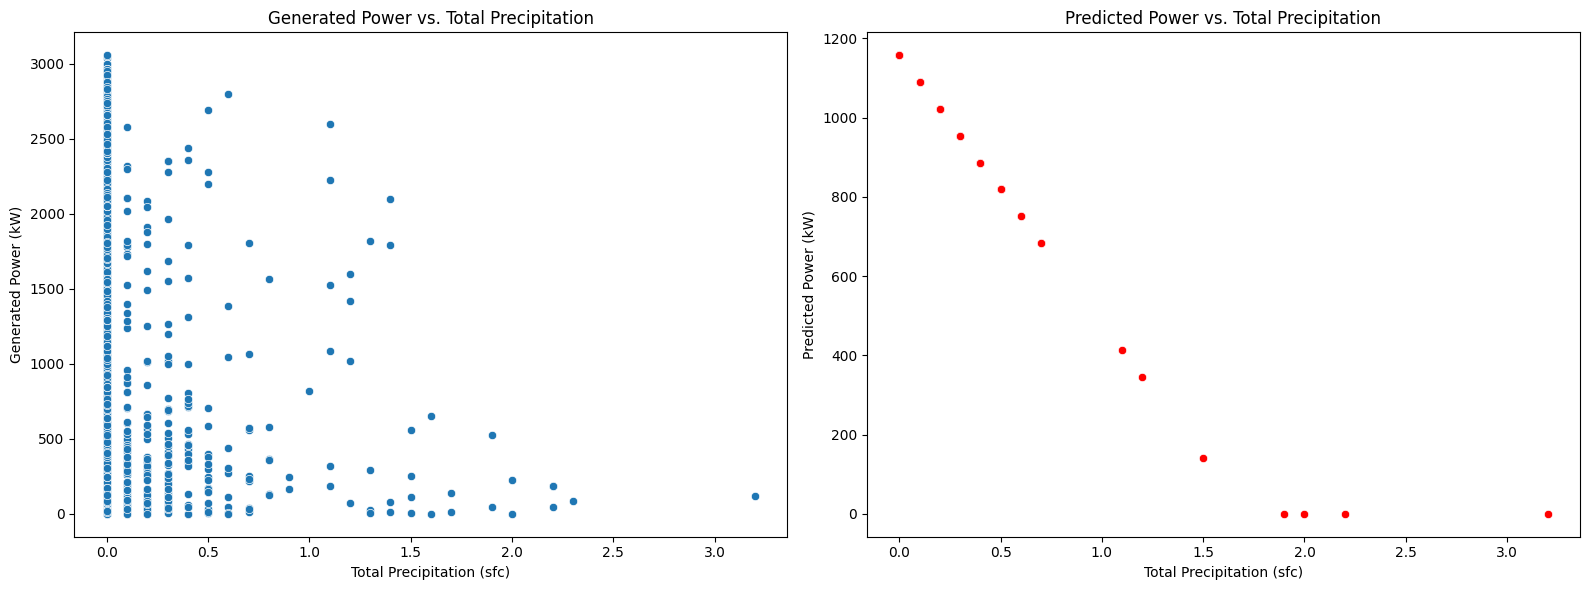

In [93]:
X_test['predicted_power'] = y_pred

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original data in the first subplot
sns.scatterplot(ax=axs[0], data=data, x='total_precipitation_sfc', y='generated_power_kw')
axs[0].set_title('Generated Power vs. Total Precipitation')
axs[0].set_xlabel('Total Precipitation (sfc)')
axs[0].set_ylabel('Generated Power (kW)')

# Plot the machine learning predictions in the second subplot
sns.scatterplot(ax=axs[1], data=X_test, x='total_precipitation_sfc', y='predicted_power', color='red')
axs[1].set_title('Predicted Power vs. Total Precipitation')
axs[1].set_xlabel('Total Precipitation (sfc)')
axs[1].set_ylabel('Predicted Power (kW)')

# Display the plots
plt.tight_layout()
plt.show()

Gradient boosting now:

In [94]:
# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_gb = np.where(y_pred_gb < 0, 0, y_pred_gb)  # Replace negative values with 0

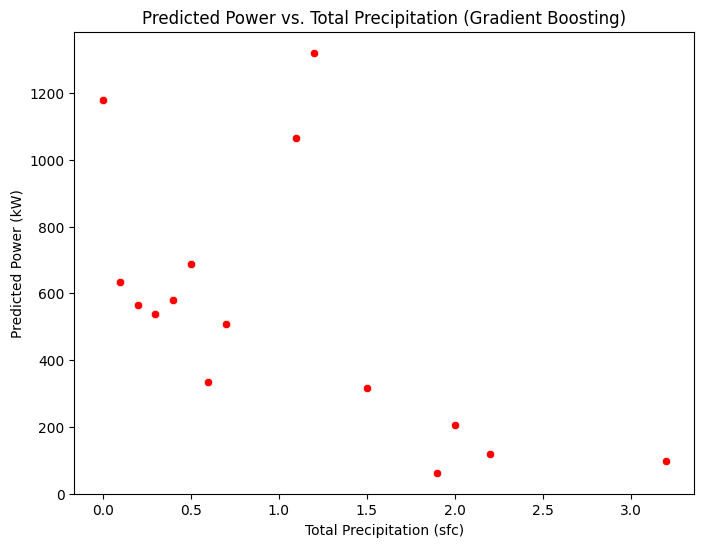

In [95]:
X_test['predicted_power_gb'] = y_pred_gb

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test, x='total_precipitation_sfc', y='predicted_power_gb', color='red')
plt.title('Predicted Power vs. Total Precipitation (Gradient Boosting)')
plt.xlabel('Total Precipitation (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

Although gradient boosting has a higher R-score, linear regression seems more reasonable when we focus solely on total precipitation (less fluctuations).

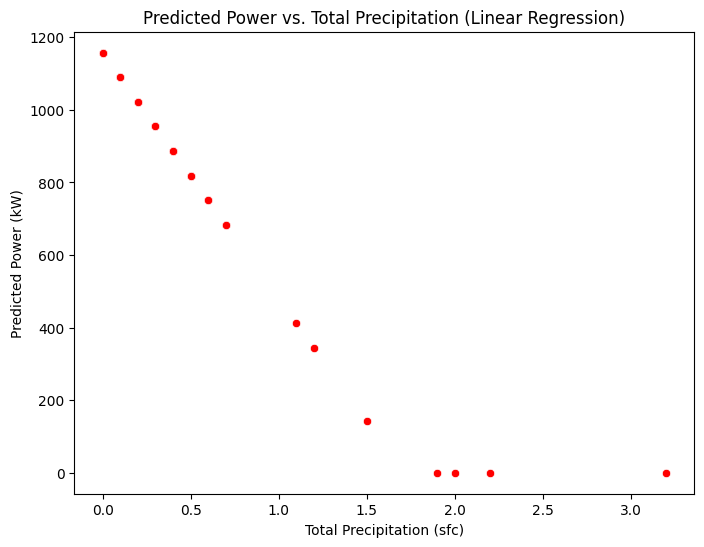

In [96]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test, x='total_precipitation_sfc', y='predicted_power', color='red')
plt.title('Predicted Power vs. Total Precipitation (Linear Regression)')
plt.xlabel('Total Precipitation (sfc)')
plt.ylabel('Predicted Power (kW)')
plt.show()

In [97]:
# Load the original dataset
data = pd.read_csv('inmet-weather2023.csv')

# Filter the data for station 'A771 - São Paulo Interlagos'
filtered_data = data[data['ESTACAO'] == 'A771']

# Select only the total precipitation column
precipitation_data = filtered_data[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]

# Convert to inches
precipitation_data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = precipitation_data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 0.0393701

precipitation_data = precipitation_data.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'total_precipitation_sfc'})

precipitation_data = precipitation_data.dropna(subset=['total_precipitation_sfc'])

# Save the new dataset to a CSV file
precipitation_data.to_csv('SaoPaulo-total-precipitation2023.csv', index=False)


<ipython-input-97-99f72520e80f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation_data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = precipitation_data['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 0.0393701


In [98]:
# Load the new dataset
new_data = pd.read_csv('SaoPaulo-total-precipitation2023.csv')


# Select the same column used for training
X_new = new_data[['total_precipitation_sfc']]

# Scale the new data using the same scaler as before
X_new_scaled = scaler.transform(X_new)

# Predict using the model
y_new_pred = model.predict(X_new_scaled)
y_new_pred = np.where(y_new_pred < 0, 0, y_new_pred)  # Replace negative values with 0

# Optionally, add predictions to your new dataset
new_data['predicted_generated_power_kw'] = y_new_pred

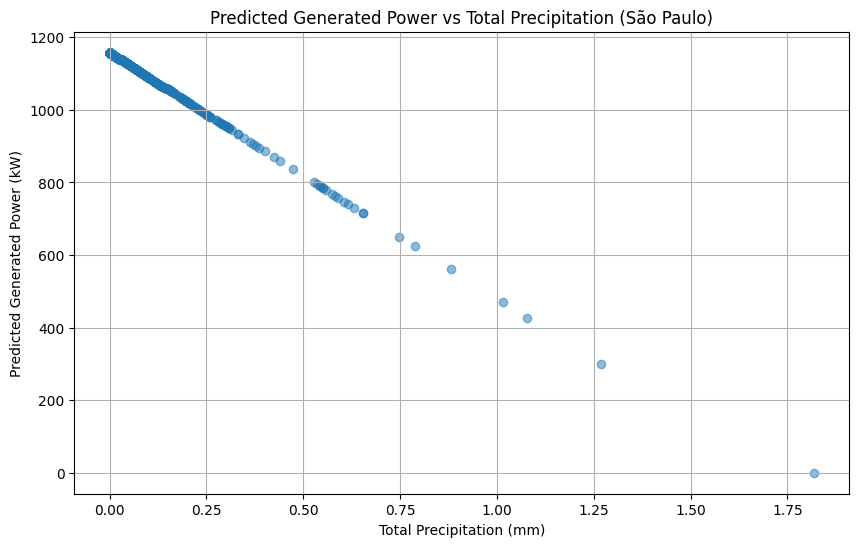

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data['total_precipitation_sfc'], y_new_pred, alpha=0.5)
plt.title('Predicted Generated Power vs Total Precipitation (São Paulo)')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Predicted Generated Power (kW)')
plt.grid(True)
plt.show()

Checking Gradient Boosting predictions:

In [100]:
# Predict using the model
y_new_pred = gb_model.predict(X_new_scaled)
y_new_pred = np.where(y_new_pred < 0, 0, y_new_pred)  # Replace negative values with 0

# Optionally, add predictions to your new dataset
new_data['predicted_generated_power_kw'] = y_new_pred

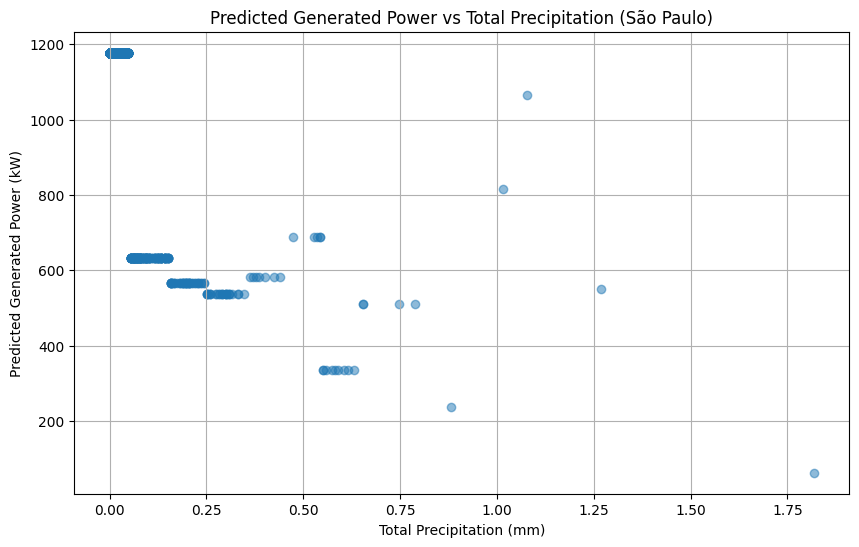

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data['total_precipitation_sfc'], y_new_pred, alpha=0.5)
plt.title('Predicted Generated Power vs Total Precipitation (São Paulo)')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Predicted Generated Power (kW)')
plt.grid(True)
plt.show()